#Pergunta fundamental

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/p-e/blob/main/lectures/10_experiments.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

Como devo planejar meus experimentos?

#Terminologia e condições de experimentação

Um experimento procura avaliar o efeito que um método, produto, substância etc possui sobre os sujeitos alvos do experimento, e são uma parte fundamental na tomada de decisão em engenharia e em ciências.

Em um experimento possuímos comumente uma **métrica** (chamada também **variável dependente**) que é uma variável que representa a resposta dos sujeitos (podem ser humanos, animais, objetos etc) ao que está sendo testado. O experimento é feito observando a resposta da métrica à variação dos **fatores**, os quais podem ter um ou mais **níveis**. O termo **tratamento** também é usado na literatura, podendo indicar fatores ou níveis. Os experimentos são projetados aplicando cada nível de cada fator a um conjunto de sujeitos. Quando múltiplas observações de cada combinação são tomadas, chamamos cada uma delas de uma **réplica**.

O número de fatores e níveis determina as técnicas estatísticas usadas na análise dos resultados. Quando temos apenas um fator com dois níveis ou dois fatores com um nível cada, por exemplo, podemos usar diretamente os **testes de hipóteses para comparação de duas amostras**, que vimos anteriormente. Casos além destes, podem ser tratados pela técnica de **análise de variância** (frequentemente chamada ANOVA) que avalia os efeitos de todas as variações ao mesmo tempo.

## Aleatorização

Um elemento fundamental de um experimento estatístico é a aleatorização dos sujeitos. Quando os sujeitos são objetos físicos ou seres vivos, costuma-se dividi-los em grupos de tratamento de forma aleatória, de forma que <u>diferenças entre os sujeitos que poderiam impactar a métrica são distribuídas entre os grupos de tratamento</u>. Isso também evita que aspectos do processo de experimentação não sejam confundidos com efeitos do tratamento.

A aleatorização pode ser empregada de formas diferentes a depender do experimento executado. Em um teste com cobaias (sejam seres inanimados ou animados), <u>escolhe-se aleatoriamente a qual nível do fator cada indivíduo será apresentado</u>. Diferentemente, em testes onde os dados precisam ser coletados em uma máquina (computador, cromatógrafo etc) cujo uso possa vir a impactar nos resultados, <u>escolhemos a ordem de apresentação das observações de forma aleatória</u>.

**Exemplo**: Imagine a avaliação de algoritmos que estressem o processador de um computador. Como este tipo de experimento tende a aumentar a temperatura do processador, os primeiros experimentos são executados na temperatura mais baixa do processador (enquanto este aquece) e os últimos serão impactados pela diminuição na performance. A aleatoriedade na execução dos tratamentos garante o balanço do efeito da temperatura do processador sobre os diferentes tratamentos.

## Condições iniciais

Outro aspecto importante é o controle das **condições iniciais** do experimento. Em testes com sujeitos vivos ou objetos físicos, é comum fazermos medições e registros pré-experimentação, de modo a conhecer as condições iniciais. Em experimentos computacionais, as condições iniciais são garantidas configurando o sistema. Manter este tipo de controle é bastante custoso na prática, mas é um cuidado que o engenheiro deve ter.

Estes aspectos das condições são os **parâmetros** do experimento, ou seja, tudo aquilo que deve ser invariante ao longo de um experimento. No caso de um exprimento de desempenho em um computador, por exemplo, o modelo do processador pode ser um elemento fundamental que deve ser cuidadosamente escolhido, bem como deve ser mantido ao longo dos experimentos.

Outro aspecto importante em sistemas computacionais e outros sistemas físicos é o **efeito de memória**. Quando o sistema tem memória, a execução de tratamentos anteriores impacta sobre a execução de novos tratamentos (o sobreaquecimento que citamos antes é um tipo de memória). Em sistemas computacionais complexos (computadores, com sistema operacional, diferentes pilhas de software etc), a igualdade da condição inicial pode ser obtida, muitas vezes, pela reinicialização do sistema.

# Experimento Completamente Aleatorizado com um Único Fator

Suponha que tenhamos <u>um único fator com $a$ níveis diferentes</u> (com $a \gt 2$) que desejamos comparar. Para cada nível obtemos um mesmo número de réplicas $n$ (dizemos que há **balanceamento entre os níveis**), formando um total de $na$ observações. A resposta para cada um dos $a$ tratamentos pode ser vista como uma VA que pode ser modelada como

$Y_{ij} = \mu_i + \epsilon_{ij}$

onde $Y_{ij}$ é uma VA denotando a $j$-ésima observação da métrica no $i$-ésimo nível, $\mu_i$ é a média do $i$-ésimo nível e $\epsilon_{ij}$ é um "ruído", um erro, aleatório que captura efeitos não modelados pelos tratamentos (não depende do tratamento) e eles são normal e independentemente distribuídos, com média zero e variância $\sigma^2$.

Se o nível não tem efeito, então $\mu_i$ será o mesmo para cada nível $i$. Podemos ainda modelar cada nível como tendo uma média global $\mu$ acompanhada de um **efeito de cada nível** $\tau_i$ (também chamados **efeitos dos tratamentos**), de tal forma que $\mu_i = \mu + \tau_i$.

De onde temos o modelo geral $Y_{ij} = \mu + \tau_i + \epsilon_{ij}$.

O que nós desejamos é testar a igualdade das médias dos níveis $\mu_1$, $\mu_2$, $\ldots$, $\mu_a$. O que é equivalente a testar as hipóteses

$H_0: \tau_1 = \tau_2 = \ldots = \tau_a = 0 \\
H_a: \tau_i \neq 0 $

Logo, se a hipótese nula for verdadeira, cada observação consistirá na média global $\mu$ mais uma componente de erro aleatório $\epsilon_{ij}$. Dito de outra forma, todas as observações seriam tomadas de uma mesma distribuição normal, com média $\mu$ e variância $\sigma^2$. Por conseguinte, se a hipótese nula for verdadeira, a mudança nos níveis do fator não tem efeito na resposta média.

## Teste ANOVA

Uma forma de aferir a validade estatística das hipóteses acima seria comparar dois a dois cada um dos níveis. Contudo, um teste para verificar a hipótese se pelo menos um dos tratamentos é diferente no conjunto todo, oferece uma abordagem inicial que pode ser aprofundada, por meio de análise gráfica e testes de hipótese dois a dois, se necessário.

O teste ANOVA procura fazer esta análise, contudo ao invés de investigar as distribuições em torno das médias dos tratamentos. Este teste procura investigar o <u>quanto da variabilidade da amostra pode ser atribuída aos tratamentos</u> e o <u>quanto pode ser atribuída aos erros aleatórios</u>.

Seja $\hat{\mu}$ a média global amostral e $y_{ij}$ cada uma das amostras, a variabilidade total (*Total Sum of Squares*) da amostra é dada por

$SST = \sum_{i=1}^{a}\sum_{j=1}^{n} (y_{ij} - \hat{\mu})^2$

Parte desta variabilidade é explicada pelos tratamentos e parte pelo erro aleatório de modo que $SST = SSR + SSE$, onde SSR é a variabilidade explicada pelos tratamentos (*Regression Sum of Squares*) e $SSE$ é a variabilidade explicada pelo erro (*Sum of Squared Errors*, também chamada variação dos resíduos) e que são calculados por

$ SSR = n\sum_{i=1}^{a} (\hat{\mu_i}-\hat{\mu})^2 \\
  SSE = \sum_{i=1}^{a}\sum_{i=1}^{n} (y_{ij}-\hat{\mu_i})^2$

onde $\hat{\mu_i}$ é a média amostral do $i$-ésimo tratamento.

Estas medidas são usadas para indicar se o tratamento tem efeito ou não. Por exemplo, quando os tratamentos têm efeito, SSR deverá ser "grande", já que ao menos algum $\hat{\mu_i}$ é diferente dos demais, e SSE deverá ser "pequeno", porque as medidas dentro de cada nível deverão ser próximas entre si.

As medidas de SSR e SSE podem ser usadas para estimar a variância $\sigma^2$ amostral, por meio dos seguintes estimadores:

$MQR = \frac{SSR}{a-1} \\
MQE = \frac{SSE}{a(n-1)}$

em que MQR é a média dos quadrados para os tratamentos e MQE é a média dos quadrados para o erro.

Se $H_0$ é verdadeira (o tratamento não tem efeito), então estas estimativas devem coincidir de modo que $F_0 = \frac{MQR}{MQE}$ é próximo de 1. A estatística $F_0$ tem uma distribuição conhecida (distribuição F) com graus de liberdade $d_1 = a-1$ e $d_2 = a(n-1)$. Com base nisso, podemos verificar se valor de $F_0$  obtido é estatisticamente significante calculando a área da função de densidade de probabilidade da distribuição onde $F \gt F_0$ (este será o valor p), i.e.,

$\text{p-valor} = 1-F_{\text{Distribuição F}}(F_0;d_1;d_2)$


###Tabela ANOVA

Os resultados do teste ANOVA são geralmente apresentados em uma tabela, denominada Tabela ANOVA. Com base nos elementos introduzidos a tabela é montada da seguinte forma.

| |Graus de liberdade|Soma quad.|Média quad.|Valor F|Valor p|
|---|----|----|----|----|----|
|**Tratamento**| a-1 |SSR|MQR|MQR/MQE|p-valor
|**Resíduos**| a(n-1)|SSE|MQE|

###Exemplo (Concentração de aldrin)
Jaffe et al mediram a concentração de diversos poluentes no rio Wolf (EUA) em diferentes profundidades do rio. Verifique se há evidência para suportar a afirmação de que a concentração de Aldrin (um tipo de inseticida) não depende da profundidade.

Mais informação sobre os dados coletados: http://www.statsci.org/data/general/wolfrive.html.

**Solução**: Comecemos importando e investigando os dados por meio de análise exploratória básica.

--2022-12-01 12:13:19--  http://www.statsci.org/data/general/wolfrive.txt
Resolving www.statsci.org (www.statsci.org)... 128.250.252.80
Connecting to www.statsci.org (www.statsci.org)|128.250.252.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557 [text/plain]
Saving to: ‘wolfrive.txt’

wolfrive.txt        100%[===================>]     557  --.-KB/s    in 0s      

2022-12-01 12:13:20 (64.4 MB/s) - ‘wolfrive.txt’ saved [557/557]

          Aldrin  HCB
Depth                
Bottom        10   10
Middepth      10   10
Surface       10   10
count    30.000000
mean      5.076333
std       1.369335
min       3.080000
25%       4.272500
50%       4.900000
75%       5.620000
max       8.790000
Name: Aldrin, dtype: float64


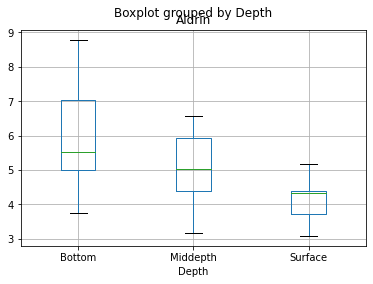

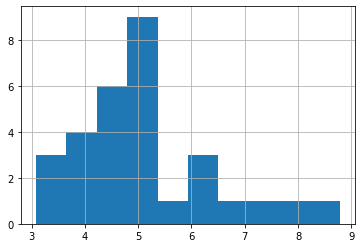

In [ ]:
!wget http://www.statsci.org/data/general/wolfrive.txt
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv("wolfrive.txt",sep="\t")
print(dados.groupby(['Depth']).count())
print(dados.Aldrin.describe())
dados.boxplot(column="Aldrin",by="Depth")
plt.show()
dados.Aldrin.hist()
plt.show()

Podemos observar um desvio padrão não muito grande nos dados globais de concentração de Aldrin. Vemos ainda uma assimetria à esquerda na distribuição de Aldrin, com poucos valores acima da média.

Percebe-se ainda uma mudança na concentração de acordo com a profundidade de coleta (boxplot), com os valores sendo menores na superfície, o que parece indicar que a densidade deste composto é maior que a da água.

Para checar a validade estatística da afirmação, vamos computar a tabela ANOVA para estes dados.

In [ ]:
import scipy.stats as st

a = 3
n = 10
mu = dados.Aldrin.mean()
mui = dados.groupby(['Depth']).Aldrin.mean()

SSR = n*(dados.groupby(['Depth']).Aldrin.mean().sub(mu).pow(2).sum())
SSE = sum([dados[dados.Depth==k].Aldrin.sub(v).pow(2).sum() for k,v in mui.items()])
d1 = a -1
d2 = a*(n-1)
MQR = SSR/d1
MQE = SSE/d2
F0 = MQR/MQE
pvalor = 1 - st.f.cdf(F0,d1,d2)
print("\t\t G. lib. S. quad. M. quad. Valor F  Valor p")
print("Tratamento \t",d1,"\t",round(SSR,2),"\t ",round(MQR,2),"\t  ",round(F0,3),"  ",round(pvalor,8))
print("Resíduos \t",d2,"\t",round(SSE,2),"\t ",round(MQE,2))

		 G. lib. S. quad. M. quad. Valor F  Valor p
Tratamento 	 2 	 16.83 	  8.42 	   6.051    0.00673919
Resíduos 	 27 	 37.55 	  1.39


Podemos ainda obter o valor de F0 e o p-valor pela biblioteca scipy. Observe que obteremos o mesmo resultado acima.

In [ ]:
dados1 = dados[dados.Depth=="Bottom"].Aldrin
dados2 = dados[dados.Depth=="Middepth"].Aldrin
dados3 = dados[dados.Depth=="Surface"].Aldrin
print(st.f_oneway(dados1,dados2,dados3))

F_onewayResult(statistic=6.051390169140599, pvalue=0.0067391899783064285)


Assim, à 95% de confiança podemos rejeitar a hipótese de que o nível de concentração não depende da profundidade.

##Análise dos resíduos

A análise de variância considera que as <u>observações sejam normal e independentemente distribuídas</u>, <u>com a mesma variância</u> para cada nível do fator. Essas suposições devem ser válidas e podem ser verificadas por meio do exame dos resíduos.

Resíduo é a diferença entre uma observação $y_{ij}$ e seu valor estimado $\hat{y}_{ij}$ a partir do modelo estatístico que está sendo estudado. Para o experimento completamente aleatorizado com um fator, temos que o valor previsto para cada observação é a média do respectivo nível ($\hat{y}_{ij} = \hat{\mu_i}$) ao qual ela pertence. Assim o resíduo $e_{ij} = {y}_{ij} - \hat{\mu_i}$. Removendo a média do valor da observação, temos que o que sobra é o efeito da variabilidade não explicada pelo tratamento.

Para **verificar a suposição de normalidade** podemos usar um **teste de hipótese para normalidade** e **análise gráfica** por meio de um gráfico de quantis e histograma para a distribuição normal.

Para **verificar a suposição de igualdade de variâncias em cada nível** (homocedasticidade), podemos traçar um **gráfico de dispersão entre os níveis e os resíduos**, com os níveis no eixo das abscissas e os respectivos resíduos no eixo das ordenadas. Similarmente, fazemos um **gráfico de dispersão entre os resíduos e a média do respectivo nível**. Em ambos os gráficos, o aparecimento de algum padrão de comportamento sugere que a suposição foi violada e que por isso o resultado do teste não é significante. Podemos ainda usar um **teste de hipótese de Bartlett** (caso os dados sejam normais) para igualdade de variâncias, ou **um teste de Levene**, caso a suposição de normalidade não se confirme.

Para verificar a **suposição de independência** pode-se fazer um gráfico dos resíduos contra a ordem em que foram realizados no experimento. Um padrão de comportamento nesse gráfico, como sequências de resíduos positivos e negativos, pode indicar que as observações não são independentes.

### Exemplo (Concentração de aldrin)
Faça a análise dos resíduos para o teste ANOVA realizado anteriormente.

**Solução**: Iniciamos verificando a suposição de normalidade por meio do teste Shapiro-Wilk para os resíduos e de seu histograma e gráfico de quantis.

ShapiroResult(statistic=0.9786766171455383, pvalue=0.7893761992454529)


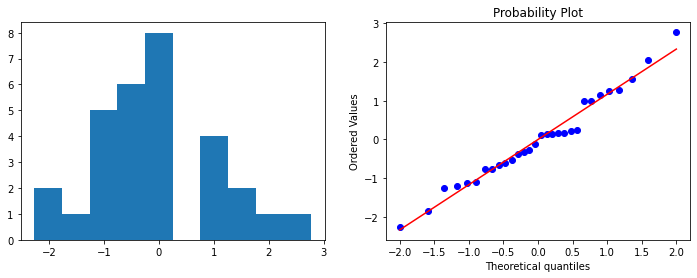

In [ ]:
import numpy as np

def qqanalise(dados,distr="norm"):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.hist(dados)
  plt.subplot(1,2,2)
  st.probplot(dados, dist=distr,plot=plt)
  plt.show()

e = []
e1 = dados1-np.mean(dados1)
e2 = dados2-np.mean(dados2)
e3 = dados3-np.mean(dados3)
e.extend(e1)
e.extend(e2)
e.extend(e3)

print(st.shapiro(e))
qqanalise(e)

Os resultados mostram que a <u>hipótese de normalidade não pode ser rejeitada</u> para os dados apresentados.

Agora faremos a análise da independência das amostras. Infelizmente não temos informação suficiente para checar esta suposição com mais cuidado, então usamos a ordem em que as amostras aparecem no conjunto de dados como um indicativo da ordem em que as amostras foram analisadas. Do gráfico abaixo, não há evidências de violação da suposição de independência.

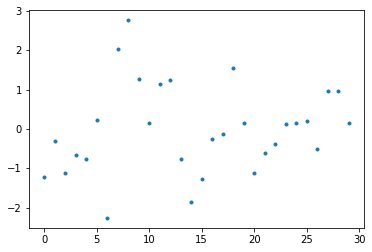

In [ ]:
plt.plot(e,".")
plt.show()

Agora procederemos com a análise de igualdade de variâncias por meio de gráficos e do teste de Bartlett

BartlettResult(statistic=5.7642960668765815, pvalue=0.056014312898074105)
2.2520089999999997 1.097729 0.40494899999999995


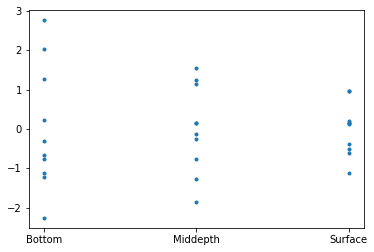

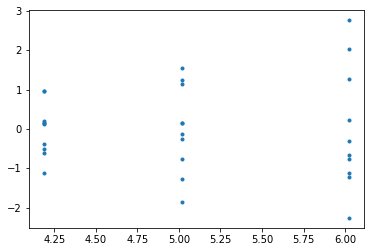

In [ ]:
print(st.bartlett(e1,e2,e3))
print(np.var(e1),np.var(e2),np.var(e3))
plt.plot(np.repeat(mui.keys(),10),e,".")
plt.show()
plt.plot(np.repeat(mui.values,10),e,".")
plt.show()

Embora o p-valor seja muito próximo de 0.05, o teste de Bartlett indica, à 95% de confiança, que não podemos rejeitar a suposição de igualdade das variâncias.

##Comparações múltiplas

No teste ANOVA, quando a hipótese nula $H_0$ é rejeitada, sabemos que pelo menos alguma das médias dos níveis é estatisticamente diferente das demais. Entretanto, a ANOVA não identifica <u>quais médias são diferentes</u>. Para isso podemos usar o **método de Fisher da mínima diferença significativa** (MDS).

O método MDS compara todos os pares de médias com as hipóteses nulas $H_0: \mu_i = \mu_j \, (\forall \, i \neq j)$, usando a estatística abaixo

$t_0 = \frac{\mu_i - \mu_j}{\sqrt{\frac{2MQE}{n}}}$

que se distribui como uma distribuição T de Student com $a(n-1)$ graus de liberdade. Portanto o valor p, para a comparação de cada par de níveis pode ser calculado computando a área nas caudas da distribuição T de Student:

$\text{p-valor} = 1 - ((F_{\text{T Student}}(|t0|;a(n-1)) - F_{\text{T Student}}(-|t0|;a(n-1)))$

### Exemplo (Concentração de aldrin)
Pelo teste ANOVA, sabemos que há diferença entre os niveis, agora aplique o MDS aos dados de concentração utilizados anteriormente, para determinar as diferenças nível a nível.

**Solução**: Para cada par devemos calcular a estatística $t_0$ e o p-valor. O código abaixo faz isso.

In [ ]:
import itertools

for c in itertools.combinations(mui.keys(),2):
  dadosI = dados[dados.Depth == c[0]].Aldrin
  dadosJ = dados[dados.Depth == c[1]].Aldrin
  muI = np.mean(dadosI)
  muJ = np.mean(dadosJ)
  t0 = (muI - muJ)/(2*MQE/n)**0.5
  pvalor = 1 - (st.t.cdf(abs(t0),27) - st.t.cdf(-abs(t0),27))
  print("P-valor para",c[0],"e",c[1],pvalor)

P-valor para Bottom e Middepth 0.06816581211647721
P-valor para Bottom e Surface 0.0017471821721772862
P-valor para Middepth e Surface 0.1271728426120705


Deste resultado concluímos que há diferença estatística entre o par Bottom e Surface, mas não entre os pares Bottom e Middepth e Surface e Middepth.

##Experimento não-balanceado

Nem sempre é possível termos a mesma quantidade de observações para cada nível de um fator. Por vezes amostras se perdem (no caso das amostras da água do rio, um descuido no laboratório poderia ocasionar a perda de uma amostra), ou mesmo não é possível encontrar sujeitos suficientes para que **o experimento seja balanceado**. O resultado é um **experimento desbalanceado**.

Embora <u>um experimento balanceado seja sempre preferível a um desbalanceado</u>, ainda assim podemos realizar o Teste ANOVA fazendo  algumas mudanças.

Assumimos que cada nível $i$ tem $n_i$ observações e que $N = \sum_{i=1}^{a}n_i$. Assim, calculamos

$SST = \sum_{i=1}^{a}\sum_{j=1}^{n_i} y_{ij}^2-\frac{\hat{\mu}^2}{N} \\
SSR = \sum_{i=1}^{a} \frac{\hat{\mu_i}^2}{n_i} - \frac{\hat{\mu}^2}{N} \\
SSE = SST - SSR \\
MQR = \frac{SSR}{a-1} \\
MQE = \frac{SSE}{N-1} \\
F_0 = \frac{MQR}{MQE} \\
d_1 = a-1 \\
d_2 = N - 1\\
\text{p-valor} = 1 - F_{\text{Distribuição F}}(F_0;d_1;d_2)$



# Experimento com dois fatores

Em alguns casos queremos avaliar como uma variável dependente se comporta em relação à diferentes fatores. Neste caso, podemos fazer de duas formas: a) elaborar vários experimentos variando cada fator individualmente (mantendo os demais fixos, como parâmetros); ou b) elaborar um experimento onde avaliamos o comportamento da métrica frente às variações de cada fator.

A estratégia a) consiste em fazer basicamente o que vimos no experimento com um fator e as técnicas que vimos serviriam para verificar o efeito de cada fator individualmente. Contudo, a estratégia b), denominada experimento com múltiplos fatores, permite não apenas capturar o efeito de cada fator individual, mas os efeitos combinados das interações entre os fatores o que pode nos fornecer muito mais informação sobre nosso objeto de estudo. Queremos discutir este segundo caso aqui, considerando o <u>caso balanceado</u>, apenas.

Nós assumimos que o primeiro fator tem $a_1$ níveis e o segundo tem $a_2$ níveis, com cada cruzamento de níveis tendo $n$ observações. Por cruzamento de níveis queremos dizer que se o fator 1 tem os níveis $l_1,l_2,l_3$ enquanto que o fator 2 tem os níveis $l_a,l_b,l_c$, então cada par $(l_i,l_j)$, em que $i \in \{1,2,3\}$ e $j \in \{a,b,c\}$, deve ter $n$ observações. A tabela abaixo ilustra esta ideia:

| |$l_1$ | $l_2$ | $l_3$|
|----|----|----|----|
|$l_a$| $n$ observações |$n$ observações |$n$ observações |
|$l_b$| $n$ observações |$n$ observações |$n$ observações |
|$l_c$| $n$ observações |$n$ observações |$n$ observações |

Observe que a aleatorização deve ainda ser usada, distribuindo as amostras entre as células de forma aleatória, de modo a evitar qualquer viés na amostragem das observações. O controle das condições iniciais também deve ser feito com cuidado, principalmente considerando que cada fator pode estar associado à diferentes parâmetros.

O experimento é realizado tratando cada observação nos níveis de cada fator e anotando as medidas da métrica de interesse. Após isso, queremos saber se algum dos fatores tem efeito e se há alguma interação entre eles. Isso pode ser feito usando métodos estatísticos similares aos que foram mostrados para um fator.

## O modelo

Consideramos agora que a resposta para cada um dos $a_1 \times a_2$ tratamentos pode ser vista como uma VA que pode ser modelada como

$Y_{ijk} = \mu_{ij} + \epsilon_{ijk}$

onde $Y_{ijk}$ é uma VA denotando a $k$-ésima observação no $i$-ésimo nível do fator 1 e $j$-ésimo nível do fator 2, $\mu_ij$ é a média da combinação de níveis $i$ e $j$ e $\epsilon_{ijk}$ é um "ruído", um erro, aleatório que captura efeitos não modelados pelos tratamentos (não depende do tratamento) e é normal e e independentemente distribuídos, com média zero e variância $\sigma^2$.

O valor de $\mu_{ij}$ é impactado por quatro fatores: uma média geral ($\mu$), o efeito do primeiro fator ($\tau_i$), o efeito do segundo fator ($\beta_j$) e o efeito da interação entre os tratamentos $\gamma_{ij}$. Assim temos que:

$\mu_{ij} = \mu + \tau_i + \beta_j + \gamma_{ij}$

## Análise estatística

As hipóteses que testaremos são dadas por:

$H_0: \tau_1 = \tau_2 = \ldots = \tau_{a_1} = 0 \\
H_a: \tau_i \neq 0 $

$H_0: \beta_1 = \beta_2 = \ldots = \beta_{a_2} = 0 \\
H_a: \beta_i \neq 0 $

$H_0: \gamma_{11} = \gamma_{12} = \ldots = \gamma_{a_1a_2} = 0 \\
H_a: \gamma_{ij} \neq 0 $

Como antes, usaremos a (**Análise de Variância**) para testar essas hipóteses pela decomposição da variabilidade total dos dados em componentes de variabilidade. Posteriormente, estas componentes serão comparadas em vistas a determinar sua significância.

A variabilidade total ($SST$) é medida pela soma total dos quadrados das observações

$SST = \sum_{i=1}^{a_1}\sum_{j=1}^{a_2}\sum_{j=1}^{n} (y_{ijk} - \hat{\mu})^2$

onde $\hat{\mu}$ é a média global amostral e $y_{ijk}$ cada uma das amostras.

Seja $\hat{\mu_{i}}$ a média amostral do $i$-ésimo nível do fator 1, desconsiderando o fator 2 (obtida sobre as observações de níveis do fator 2) e $\hat{\mu_{j}}$ a média amostral do $i$-ésimo nível do fator 2, desconsiderando o fator 1, as variabilidades atribuídas aos fatores 1 e 2 ($SS_1$ e $SS_2$, respectivamente) são dadas por:

$SS_1 = a_2n \sum_{i=1}^{a_1}(\hat{\mu_{i}}-\hat{\mu})^2 \\
SS_2 = a_1n \sum_{j=1}^{a_2}(\hat{\mu_{j}}-\hat{\mu})^2$

A variabilidade devida às interações ($SS_{12}$) é computada por

$SS_{12} = n \sum_{i=1}^{a_1}\sum_{j=1}^{a_2}(\hat{\mu_{ij}}-\hat{\mu_{i}}-\hat{\mu_{j}}+\hat{\mu})^2$

onde $\hat{\mu_{ij}}$ é a média amostral dos níveis i e j, obtida tomando a métrica apenas para as observações do nível $i$ do fator 1 e do nível $j$ do fator 2.

Finalmente, a variabilidade atribuída aos erros é dada por

$SSE = \sum_{i=1}^{a_1}\sum_{j=1}^{a_2}\sum_{k=1}^{n}(y_{ijk}-\hat{\mu_{ij}})^2$

Estas componentes se relacionam pela relação fundamental $SST = SS_1 + SS_2 + SS_{12} + SSE$.

Assim como para o caso de um fator, se as hipóteses nulas para os efeitos e para as interações forem verdadeiras, então os seguintes estimadores são todos bons estimadores para $\sigma^2$:

$MQ_1 = \frac{SQ_1}{a_1-1} \quad MQ_2 = \frac{SQ_2}{a_2-1} \quad MQ_{12} = \frac{SQ_{12}}{(a_1-1)(a_2-1)} \quad MQE = \frac{SQE}{a_1a_2(n-1)}$

Para testar o fato do efeito do fator 1 ser igual a zero ($H_0: \tau_i = 0$), do efeito do fator 2 ser igual a zero ($H_0: \beta_j = 0$) e dos efeitos de interação serem iguais a zero ($H_0: \gamma_{ij} = 0$), usaremos as estatísticas

$F^1_0 = \frac{MQ_1}{MQE} \quad F^2_0 = \frac{MQ_2}{MQE} \quad F^{12}_0 = \frac{MQ_{12}}{MQE}$

Sob as hipóteses nulas, $F^1_0$ se distribui como uma Distribuição F com $d_1=a_1-1$ e $d_2=a_1a_2(n-1)$ graus de liberdade. Já $F^2_0$ se distribui como uma Distribuição F com $d_1=a_2-1$ e $d_2=a_1a_2(n-1)$ graus de liberdade. Por fim, $F^{12}_0$ se distribui como uma Distribuição F com $d_1=(a_1-1)(a_2-1)$ e $d_2=a_1a_2(n-1)$ graus de liberdade.

Com base nisso, podemos verificar se valor de cada estatística F obtida é estatisticamente significante calculando a área da função de densidade de probabilidade da distribuição onde $F \gt F_0$  (este será o valor p), i.e.,

$\text{p-valor}=1−F_{\text{Distribuição F}}(F_0;d_1;d_2)$

onde $F_0$ é a respectiva estatística para cada hipótese, bem como $d_1$ e $d_2$ são os graus de liberdade respectivos às estatísticas.

###Tabela ANOVA

A Tabela ANOVA para um experimento com dois fatores e múltiplos níveis é mostrada abaixo.

| |Graus de liberdade|Soma quad.|Média quad.|Valor F|Valor p|
|---|----|----|----|----|----|
|**Fator 1**| $a_1-1$ |$SS_1$|$MQ_1$|$\frac{MQ_1}{MQE}$|p-valor
|**Fator 2**| $a_2-1$ |$SS_2$|$MQ_2$|$\frac{MQ_2}{MQE}$|p-valor
|**Interação**| $(a_1-1)(a_{2}-1)$ |$SS_{12}$|$MQ_{12}$|$\frac{MQ_{12}}{MQE}$|p-valor
|**Resíduos**| $a_1a_2(n-1)$|SSE|MQE|

###Exemplo (Veneno e Antídoto)

O conjunto de dados abaixo registra o tempo de vida (em unidades de 10 horas) de animais envenenados com três diferentes venenos e tratados com um de quatro antídotos. Faça a análise de variância para este experimento e verifique se os efeitos do veneno e dos antídotos são significativos no tempo de vida.

Mais informações: http://www.statsci.org/data/general/poison.html


**Solução**: Comecemos importanto e investigando os dados por meio de análise exploratória básica.

In [ ]:
!wget http://www.statsci.org/data/general/poison.txt
import pandas as pd
import numpy as np

dados=pd.read_csv("poison.txt",sep="\t")
dados.head()

--2023-06-23 23:47:15--  http://www.statsci.org/data/general/poison.txt
Resolving www.statsci.org (www.statsci.org)... 128.250.252.80
Connecting to www.statsci.org (www.statsci.org)|128.250.252.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454 [text/plain]
Saving to: ‘poison.txt’

poison.txt          100%[===================>]     454  --.-KB/s    in 0s      

2023-06-23 23:47:15 (74.3 MB/s) - ‘poison.txt’ saved [454/454]



,Poison,Treatment,Time
0,1,1,0.31
1,1,1,0.45
2,1,1,0.46
3,1,1,0.43
4,1,2,0.82


Poison       48
Treatment    48
Time         48
dtype: int64
count    48.000000
mean      0.479375
std       0.252859
min       0.180000
25%       0.300000
50%       0.400000
75%       0.622500
max       1.240000
Name: Time, dtype: float64


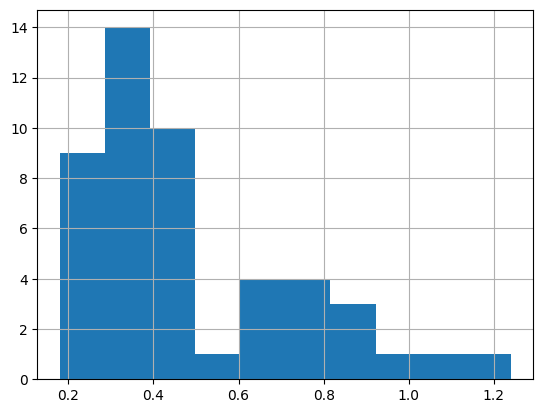

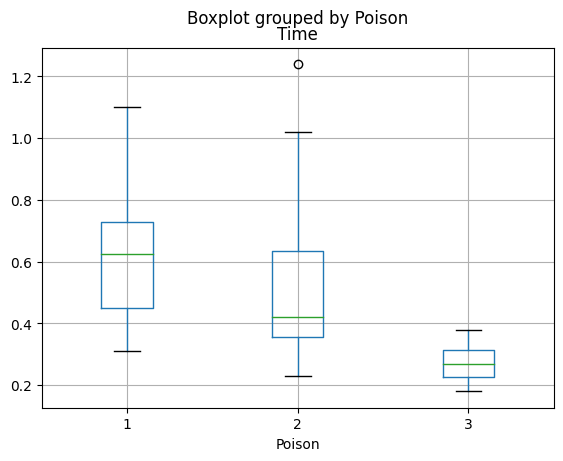

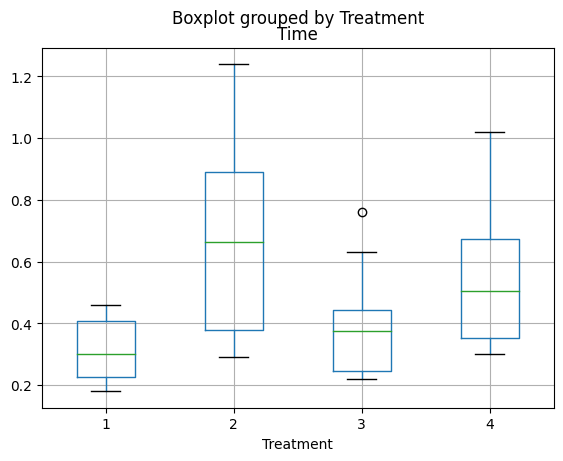

In [ ]:
import matplotlib.pyplot as plt

print(dados.count())
print(dados.Time.describe())
dados.Time.hist()
plt.show()
dados.boxplot(column="Time",by="Poison")
plt.show()
dados.boxplot(column="Time",by="Treatment")
plt.show()

Os dados parecem indicar que ambos fatores (veneno - Poison; e antídoto - Treatment) têm impacto sobre o tempo de vida. Abaixo nós construímos a tabela ANOVA para este conjunto de dados.

In [ ]:
import scipy.stats as st

a1 = dados.Poison.nunique()
a2 = dados.Treatment.nunique()
n = dados.Time.count()/(a1*a2) #podemos fazer isso, porque o experimento foi balanceado
mu = dados.Time.mean()
mui = dados.groupby("Poison").Time.mean()
muj = dados.groupby("Treatment").Time.mean()
muij = dados.groupby(["Poison","Treatment"]).Time.mean()

SST = dados.Time.sub(mu).pow(2).sum()
SS1 = a2*n*mui.sub(mu).pow(2).sum()
SS2 = a1*n*muj.sub(mu).pow(2).sum()
SS12 = n*muij.sub(mui).sub(muj).add(mu).pow(2).sum()
SSE = sum([dados[dados.Poison==k[0]][dados.Treatment==k[1]].Time.sub(v).pow(2).sum() for k,v in muij.items()])
d1 = a1-1
d2 = a2-1
d12 = d1*d2
de = a1*a2*(n-1)
MQ1 = SS1/d1
MQ2 = SS2/d2
MQ12 = SS12/d12
MQE = SSE/de
F01 = MQ1/MQE
pvalor1 = 1 - st.f.cdf(F01,d1,de)
F02 = MQ2/MQE
pvalor2 = 1 - st.f.cdf(F02,d2,de)
F012 = MQ12/MQE
pvalor12 = 1 - st.f.cdf(F012,d12,de)
print("\t\t G. lib. S. quad. M. quad. Valor F  Valor p")
print("Fator 1 \t",d1,"\t",round(SS1,2),"\t ",round(MQ1,2),"\t  ",round(F01,3),"  ",round(pvalor1,8))
print("Fator 2 \t",d2,"\t",round(SS2,2),"\t ",round(MQ2,2),"\t  ",round(F02,3),"  ",round(pvalor2,8))
print("Interação \t",d12,"\t",round(SS12,2),"\t ",round(MQ12,2),"\t  ",round(F012,3),"  ",round(pvalor12,8))
print("Resíduos \t",de,"\t",round(SSE,2),"\t ",round(MQE,2))

		 G. lib. S. quad. M. quad. Valor F  Valor p
Fator 1 	 2 	 1.03 	  0.52 	   23.222    3.3e-07
Fator 2 	 3 	 0.92 	  0.31 	   13.806    3.78e-06
Interação 	 6 	 0.25 	  0.04 	   1.874    0.11225061
Resíduos 	 36.0 	 0.8 	  0.02


<ipython-input-4-71fc5d5ca461>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SSE = sum([dados[dados.Poison==k[0]][dados.Treatment==k[1]].Time.sub(v).pow(2).sum() for k,v in muij.items()])


Abaixo mostramos como fazer o teste usando a biblioteca statsmodels.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("""Time ~ C(Poison) + C(Treatment) + C(Poison):C(Treatment)""", data=dados).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Poison),2.0,1.033013,0.516506,23.221737,3.331440e-07
C(Treatment),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(Poison):C(Treatment),6.0,0.250137,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


In [ ]:
model.resid
import scipy.stats as st
st.shapiro(model.resid)

ShapiroResult(statistic=0.9122891426086426, pvalue=0.0016067486722022295)

Da tabela verificamos que não há evidências do impacto da interação entre as variáveis no tempo de vida e que tanto o antídoto quanto o veneno têm impacto sobre o tempo de vida dos animais. Sobre o impacto podemos criar um gráfico de médias para o fator antídoto, e observar o impacto de cada antídoto sobre as curvas de cada tipo de veneno.

Observe abaixo que para todos os tipos de veneno o comportamento em relação ao antídoto é o similar, inicia baixo, sobe, decresce e depois sobe novamente. Caso houvesse alguma interação, uma destas curvas teria comportamento diferente das demais.

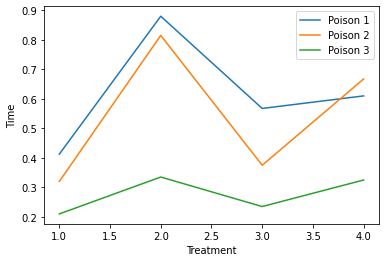

In [ ]:
for i in range(a1):
  plt.plot(muij[i+1,],label="Poison "+str(i+1))
plt.xlabel("Treatment")
plt.ylabel("Time")
plt.legend()

##Análise dos resíduos

Assim como no caso de um fator, a ANOVA para dois fatores considera que as observações sejam **normal e independentemente distribuídas**, com a **mesma variância para cada nível de cada fator**. Usaremos a análise dos resíduos novamente, para checar estas suposições.

O resíduo no experimento com dois fatores é $e_{ijk} = y_{ijk} - \hat{\mu_{ij}}$, ou seja, removendo o efeito dos fatores ($\hat{\mu_{ij}}$) o que sobra é o efeito da variabilidade não explicada pelos tratamentos.

Para a suposição de normalidade:
* Usamos um teste de hipótese para normalidade;
* Gráfico de quantis para a distribuição normal; e
* Histograma

Para a suposição de igualdade de variâncias em cada nível de cada fator (homocedasticidade):
* Traçamos um gráfico de dispersão entre os níveis do Fator 1 e os resíduos;
* Traçamos um gráfico de dispersão entre os níveis do Fator2 e os resíduos;
* Traçamos um gráfico de dispersão entre os resíduos e $\hat{\mu_{ij}}$, que é a média da combinação de cada nível de cada fator.
* Teste de hipótese de Bartlett para igualdade de variâncias dentro de cada fator

###Exemplo (Veneno e Antídoto)

Faça a análise dos resíduos para o teste ANOVA dos dados de tempo de vida de animais envenenados.


**Solução**: Começamos calculando os resíduos e fazendo as verificações de normalidade.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ =

(0.9122891426086426, 0.0016067486722022295)


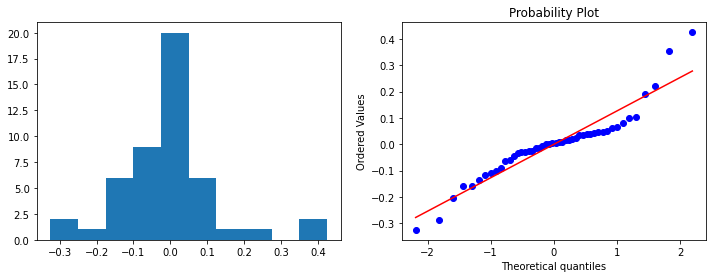

In [ ]:
def qqanalise(dados,distr="norm"):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.hist(dados)
  plt.subplot(1,2,2)
  st.probplot(dados, dist=distr,plot=plt)
  plt.show()

erro = {k: list(dados[dados.Poison==k[0]][dados.Treatment==k[1]].Time.sub(v).values) for k,v in muij.items()}
e = []
for k,v in erro.items():
  e.extend(v)
print(st.shapiro(e))
qqanalise(e)

A grosso modo, pelo teste rejeitamos a suposição de normalidade. Contudo, o QQplot mostra um desvio nas caudas (à esquerda e à direita), os quais provavelmente estão causando a rejeição no teste Shapiro-Wilk.

Abaixo verificamos isso, eliminando valores dos resíduos acima de 0.25 e abaixo de -0.25. Observe que após eliminarmos apenas 4 amostras (nas caudas) o teste Shapiro-Wilk não rejeita a hipótese de normalidade. Isto indica que estas amostras devem tratar-se de outliers e que por isso, o desvio de normalidade não parece grave.

Continuaremos o restante da análise mantendo os dados discrepantes, já que não temos evidências suficientes para removê-los. Além de que sua remoção afetaria o balanceamento entre as classes do teste ANOVA.

48 44
(0.9648853540420532, 0.1976613700389862)


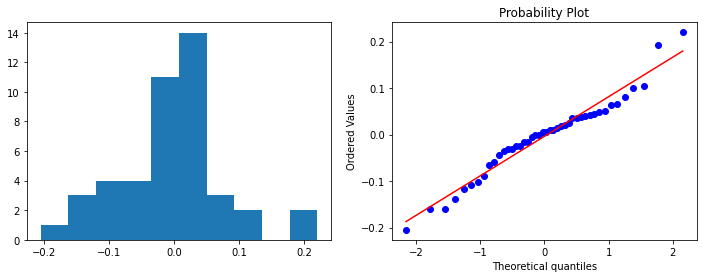

In [ ]:
e_test = []
for i in e:
  if i < 0.25 and i > -0.25:
    e_test.append(i)
print(len(e),len(e_test))
print(st.shapiro(e_test))
qqanalise(e_test)

Agora verificaremos a suposição de igualdade de variâncias dentre os níveis de cada fator.

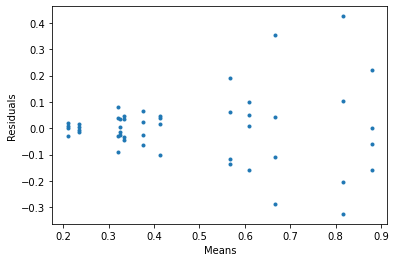

BartlettResult(statistic=39.592053373876986, pvalue=2.5275214284770314e-09)


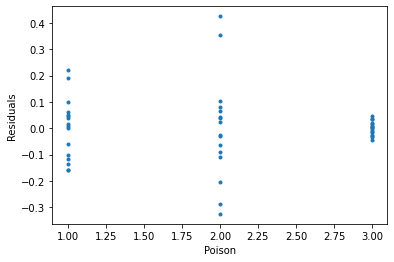

BartlettResult(statistic=17.632204638067215, pvalue=0.0005237466459229847)


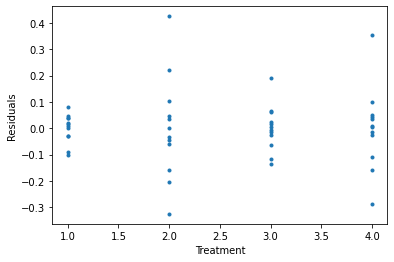

BartlettResult(statistic=57.31201709908052, pvalue=1.579583333360577e-10)
0.34787429107500756 19.42380952380952 55.83571428571426


In [ ]:
fator1 = []
fator2 = []
medias = []
erro1 = {1:[],2:[],3:[]}
erro2 = {1:[],2:[],3:[],4:[]}
for k,v in erro.items():
  fator1.extend([k[0]]*4)
  fator2.extend([k[1]]*4)
  erro1[k[0]].extend(v)
  erro2[k[1]].extend(v)
  medias.extend([muij[k]]*4)

plt.plot(medias,e,".")
plt.ylabel("Residuals")
plt.xlabel("Means")
plt.show()
print(st.bartlett(erro1[1],erro1[2],erro1[3]))
plt.plot(fator1,e,".")
plt.ylabel("Residuals")
plt.xlabel("Poison")
plt.show()
print(st.bartlett(erro2[1],erro2[2],erro2[3],erro2[4]))
plt.plot(fator2,e,".")
plt.ylabel("Residuals")
plt.xlabel("Treatment")
plt.show()
print(st.bartlett(erro1[1],erro1[2],erro1[3],erro2[1],erro2[2],erro2[3],erro2[4]))
print(np.var(erro1[1])/np.var(erro1[2]),np.var(erro1[1])/np.var(erro1[3]),np.var(erro1[2])/np.var(erro1[3]))

Os resultados nos mostram que **não há homogeneidade de variâncias** entre os níveis de ambos dos fatores. Na realidade, a variância é afetada pelo nível do tratamento. A variância do Veneno 3, por exemplo, é muito menor do que o Veneno 1. O mesmo acontece se compararmos os Antídotos 1 e 2. Além disso, a variância aumenta com o valor das médias.

Observe que neste caso, mesmo se removermos as quatro amostras que marcamos como outliers, estes comportamentos ainda se apresentam.

O não cumprimento desta suposição diminui o poder do teste ANOVA. Contudo, ANOVA é **mais robusto contra heterocedasticidade quando o experimento é balanceado**.

Relembremos o valor p obtido para cada fator e para a interação:

* Fator 1, valor p = 3.3e-07
* Fator 2, valor p = 3.78e-06
* Interação, valor p = 0.11225061

Como o valor p para os fatores 1 e 2 são muito baixos, provavelmente a conclusão deve estar correta. Contudo, podemos ter alguma suspeita para o caso da Interação.



#Lições aprendidas
* O assunto de Projeto de Experimentos é vasto e possui farta literatura associada, existem muitos e diferentes métodos tanto para projetar os experimentos quanto para analisar os resultados
* Cada área de conhecimento procura definir os tipos de experimentos mais comuns e os projetos mais interessantes em cada área
* Desta aula é importante ter em mente que em qualquer experimento estatístico devem ser garantidas as suposições básicas: aleatoriedade e condições iniciais controladas.
* Para uso da ANOVA, deve-se atentar para a análise dos resíduos e a avaliação das suposições associadas